In [56]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier, Pool

In [57]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) # Seed 고정

In [58]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [59]:
train_x = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality'])
train_y = train_df['Y_Class']

test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

In [60]:
train_x = train_x.fillna(0)
test_x = test_x.fillna(0)

In [61]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [62]:
from sklearn.model_selection import train_test_split
# train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, shuffle=True, stratify=train_y, random_state=34)

In [63]:
catboost = CatBoostClassifier(random_state=37).fit(x_train, y_train)
print('Done.')

0:	learn: 1.0904422	total: 5.93s	remaining: 1h 38m 42s
1:	learn: 1.0830773	total: 11.7s	remaining: 1h 36m 59s
2:	learn: 1.0756175	total: 17.3s	remaining: 1h 35m 48s
3:	learn: 1.0690574	total: 22.9s	remaining: 1h 35m 9s
4:	learn: 1.0620419	total: 24.3s	remaining: 1h 20m 37s
5:	learn: 1.0554905	total: 30s	remaining: 1h 22m 53s
6:	learn: 1.0491390	total: 30.7s	remaining: 1h 12m 40s
7:	learn: 1.0424499	total: 36.5s	remaining: 1h 15m 29s
8:	learn: 1.0363563	total: 42.2s	remaining: 1h 17m 29s
9:	learn: 1.0303571	total: 48.1s	remaining: 1h 19m 22s
10:	learn: 1.0241857	total: 53.9s	remaining: 1h 20m 46s
11:	learn: 1.0181570	total: 54.3s	remaining: 1h 14m 27s
12:	learn: 1.0124817	total: 59.9s	remaining: 1h 15m 49s
13:	learn: 1.0066862	total: 1m 5s	remaining: 1h 17m 4s
14:	learn: 1.0011014	total: 1m 8s	remaining: 1h 15m 1s
15:	learn: 0.9957344	total: 1m 14s	remaining: 1h 16m 13s
16:	learn: 0.9903881	total: 1m 20s	remaining: 1h 17m 16s
17:	learn: 0.9850596	total: 1m 26s	remaining: 1h 18m 27s
18:	

145:	learn: 0.6835997	total: 12m 5s	remaining: 1h 10m 41s
146:	learn: 0.6825964	total: 12m 10s	remaining: 1h 10m 40s
147:	learn: 0.6813361	total: 12m 16s	remaining: 1h 10m 40s
148:	learn: 0.6800287	total: 12m 22s	remaining: 1h 10m 38s
149:	learn: 0.6790982	total: 12m 27s	remaining: 1h 10m 37s
150:	learn: 0.6779152	total: 12m 33s	remaining: 1h 10m 36s
151:	learn: 0.6770324	total: 12m 33s	remaining: 1h 10m 5s
152:	learn: 0.6761181	total: 12m 39s	remaining: 1h 10m 4s
153:	learn: 0.6752559	total: 12m 45s	remaining: 1h 10m 3s
154:	learn: 0.6741390	total: 12m 46s	remaining: 1h 9m 38s
155:	learn: 0.6733066	total: 12m 52s	remaining: 1h 9m 37s
156:	learn: 0.6724096	total: 12m 57s	remaining: 1h 9m 36s
157:	learn: 0.6714618	total: 13m	remaining: 1h 9m 19s
158:	learn: 0.6704291	total: 13m 6s	remaining: 1h 9m 18s
159:	learn: 0.6697872	total: 13m 11s	remaining: 1h 9m 17s
160:	learn: 0.6692559	total: 13m 12s	remaining: 1h 8m 49s
161:	learn: 0.6684502	total: 13m 18s	remaining: 1h 8m 48s
162:	learn: 0.

287:	learn: 0.5837782	total: 25m 41s	remaining: 1h 3m 30s
288:	learn: 0.5830372	total: 25m 48s	remaining: 1h 3m 29s
289:	learn: 0.5824505	total: 25m 55s	remaining: 1h 3m 29s
290:	learn: 0.5819390	total: 26m 2s	remaining: 1h 3m 26s
291:	learn: 0.5814399	total: 26m 8s	remaining: 1h 3m 22s
292:	learn: 0.5809572	total: 26m 14s	remaining: 1h 3m 18s
293:	learn: 0.5804707	total: 26m 20s	remaining: 1h 3m 14s
294:	learn: 0.5799382	total: 26m 25s	remaining: 1h 3m 9s
295:	learn: 0.5793042	total: 26m 31s	remaining: 1h 3m 6s
296:	learn: 0.5787305	total: 26m 37s	remaining: 1h 3m 1s
297:	learn: 0.5782354	total: 26m 43s	remaining: 1h 2m 57s
298:	learn: 0.5777595	total: 26m 49s	remaining: 1h 2m 52s
299:	learn: 0.5772606	total: 26m 54s	remaining: 1h 2m 47s
300:	learn: 0.5767928	total: 27m	remaining: 1h 2m 43s
301:	learn: 0.5762686	total: 27m 6s	remaining: 1h 2m 38s
302:	learn: 0.5759115	total: 27m 11s	remaining: 1h 2m 33s
303:	learn: 0.5752706	total: 27m 17s	remaining: 1h 2m 28s
304:	learn: 0.5748759	to

434:	learn: 0.5205825	total: 39m 54s	remaining: 51m 49s
435:	learn: 0.5201874	total: 40m 1s	remaining: 51m 46s
436:	learn: 0.5197162	total: 40m 8s	remaining: 51m 42s
437:	learn: 0.5192237	total: 40m 14s	remaining: 51m 37s
438:	learn: 0.5188544	total: 40m 20s	remaining: 51m 33s
439:	learn: 0.5184552	total: 40m 26s	remaining: 51m 28s
440:	learn: 0.5179797	total: 40m 32s	remaining: 51m 23s
441:	learn: 0.5177907	total: 40m 39s	remaining: 51m 19s
442:	learn: 0.5174262	total: 40m 45s	remaining: 51m 15s
443:	learn: 0.5170786	total: 40m 52s	remaining: 51m 10s
444:	learn: 0.5167421	total: 40m 58s	remaining: 51m 6s
445:	learn: 0.5165671	total: 41m 6s	remaining: 51m 3s
446:	learn: 0.5162896	total: 41m 14s	remaining: 51m
447:	learn: 0.5159308	total: 41m 20s	remaining: 50m 56s
448:	learn: 0.5155569	total: 41m 26s	remaining: 50m 51s
449:	learn: 0.5153226	total: 41m 29s	remaining: 50m 43s
450:	learn: 0.5149606	total: 41m 35s	remaining: 50m 38s
451:	learn: 0.5142879	total: 41m 43s	remaining: 50m 35s
4

582:	learn: 0.4672574	total: 54m 41s	remaining: 39m 7s
583:	learn: 0.4670422	total: 54m 47s	remaining: 39m 1s
584:	learn: 0.4667818	total: 54m 52s	remaining: 38m 55s
585:	learn: 0.4665435	total: 54m 58s	remaining: 38m 50s
586:	learn: 0.4662761	total: 55m 4s	remaining: 38m 44s
587:	learn: 0.4657993	total: 55m 9s	remaining: 38m 39s
588:	learn: 0.4654078	total: 55m 15s	remaining: 38m 33s
589:	learn: 0.4649081	total: 55m 20s	remaining: 38m 27s
590:	learn: 0.4644945	total: 55m 26s	remaining: 38m 22s
591:	learn: 0.4641899	total: 55m 32s	remaining: 38m 16s
592:	learn: 0.4638261	total: 55m 37s	remaining: 38m 10s
593:	learn: 0.4634830	total: 55m 43s	remaining: 38m 5s
594:	learn: 0.4631965	total: 55m 49s	remaining: 37m 59s
595:	learn: 0.4628084	total: 55m 54s	remaining: 37m 54s
596:	learn: 0.4624739	total: 56m	remaining: 37m 48s
597:	learn: 0.4621056	total: 56m 6s	remaining: 37m 42s
598:	learn: 0.4617083	total: 56m 11s	remaining: 37m 37s
599:	learn: 0.4613538	total: 56m 17s	remaining: 37m 31s
60

727:	learn: 0.4126008	total: 1h 9m 43s	remaining: 26m 3s
728:	learn: 0.4123580	total: 1h 9m 49s	remaining: 25m 57s
729:	learn: 0.4119913	total: 1h 9m 55s	remaining: 25m 51s
730:	learn: 0.4117146	total: 1h 10m 1s	remaining: 25m 46s
731:	learn: 0.4111550	total: 1h 10m 8s	remaining: 25m 40s
732:	learn: 0.4108368	total: 1h 10m 14s	remaining: 25m 35s
733:	learn: 0.4104614	total: 1h 10m 20s	remaining: 25m 29s
734:	learn: 0.4099325	total: 1h 10m 27s	remaining: 25m 24s
735:	learn: 0.4095403	total: 1h 10m 33s	remaining: 25m 18s
736:	learn: 0.4091374	total: 1h 10m 39s	remaining: 25m 12s
737:	learn: 0.4088074	total: 1h 10m 45s	remaining: 25m 7s
738:	learn: 0.4081832	total: 1h 10m 51s	remaining: 25m 1s
739:	learn: 0.4078638	total: 1h 10m 58s	remaining: 24m 56s
740:	learn: 0.4075825	total: 1h 11m 4s	remaining: 24m 50s
741:	learn: 0.4072274	total: 1h 11m 10s	remaining: 24m 44s
742:	learn: 0.4068773	total: 1h 11m 16s	remaining: 24m 39s
743:	learn: 0.4064251	total: 1h 11m 22s	remaining: 24m 33s
744:	l

868:	learn: 0.3586895	total: 1h 24m 19s	remaining: 12m 42s
869:	learn: 0.3582804	total: 1h 24m 26s	remaining: 12m 37s
870:	learn: 0.3578361	total: 1h 24m 32s	remaining: 12m 31s
871:	learn: 0.3575002	total: 1h 24m 38s	remaining: 12m 25s
872:	learn: 0.3571525	total: 1h 24m 44s	remaining: 12m 19s
873:	learn: 0.3567041	total: 1h 24m 51s	remaining: 12m 13s
874:	learn: 0.3564289	total: 1h 24m 57s	remaining: 12m 8s
875:	learn: 0.3561442	total: 1h 25m 4s	remaining: 12m 2s
876:	learn: 0.3557564	total: 1h 25m 13s	remaining: 11m 57s
877:	learn: 0.3553135	total: 1h 25m 20s	remaining: 11m 51s
878:	learn: 0.3550281	total: 1h 25m 28s	remaining: 11m 45s
879:	learn: 0.3547006	total: 1h 25m 34s	remaining: 11m 40s
880:	learn: 0.3541863	total: 1h 25m 41s	remaining: 11m 34s
881:	learn: 0.3538091	total: 1h 25m 47s	remaining: 11m 28s
882:	learn: 0.3535363	total: 1h 25m 53s	remaining: 11m 22s
883:	learn: 0.3530821	total: 1h 25m 59s	remaining: 11m 17s
884:	learn: 0.3526754	total: 1h 26m 6s	remaining: 11m 11s
8

In [66]:
preds = catboost.predict(x_valid)
print('Done.')

Done.


In [67]:
a =f1_score(preds, y_valid, average='macro')
print(a)
b = f1_score(preds, y_valid, average='micro')
print(b)
c = f1_score(preds, y_valid, average='weighted')
print(c)

0.48500881834215165
0.7166666666666667
0.7702380952380952


In [69]:
from sklearn.ensemble import VotingClassifier

In [73]:
from sklearn.ensemble import RandomForestClassifier 


X_train,X_test,y_train,y_test = train_test_split(train_x,train_y,test_size = 0.2, random_state = 156)

#랜덤 포레스트 학습/예측/평가
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
f1 = f1_score(y_test,pred,average='macro')
print(f1)

0.5598458511871075


In [76]:
from sklearn.model_selection import GridSearchCV

#랜덤 포레스트 하이퍼 파라미터 튜닝 
params = { 'n_estimators':[100],
  	   'max_depth':[6,8,10,12],
       	  'min_samples_leaf':[8,12,18], 
          'min_samples_split':[8,16,20]}
          
#랜덤 포래스트 객체 생성 후 gridsearchcv수행
rf=RandomForestClassifier(random_state=0,n_jobs=-1)
grid_cv=GridSearchCV(rf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(X_train,y_train)
pred=grid_cv.predict(X_test)
f1 = f1_score(y_test,pred,average='macro')
print(f1)

#gridsearchcv를 이용해 최적으로 학습된 estimator로 예측 수행
gb_pred=grid_cv.best_estimator_
pred = gb_pred.predict(X_test)
f1_score_1= f1_score(y_test,pred,average='macro')
print(f1_score_1)

0.505846385960733
0.505846385960733


# Classification Model Fit

In [11]:
preds = catboost.predict(test_x)
print('Done.')

Done.


# Submit

(array([ 40.,   0.,   0.,   0.,   0., 260.,   0.,   0.,   0.,  10.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

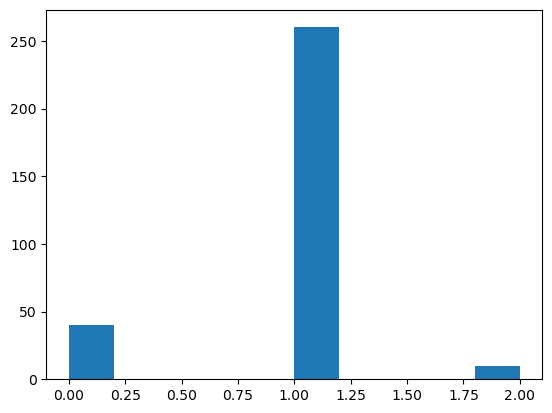

In [12]:
submission = pd.read_csv('./submit.csv')
submission["Y_Class"] = preds
plt.hist(preds)

In [13]:
submit = pd.read_csv('./submit.csv')

In [14]:
submit['Y_Class'] = preds

In [15]:
submit.to_csv('./submission.csv', index=False)

In [ ]:
# CatBoost 모델링
def catboost_modeling(x_train, y_train, x_test, grow_policy, depth, learning_rate, l2_leaf_reg, random_seed, n):
  
  # 빈 Series인 test_pred 생성
  test_pred = pd.Series([0 for x in range(len(x_test))], index=x_test.index)
  
  # 10-fold 모델링을 n회 반복할 것
  for i in range(n):
    kf = KFold(n_splits=10, random_state=random_seed+i)
    for train_index, valid_index in kf.split(x_train):
      train_x, train_y = x_train.iloc[train_index], y_train[train_index]
      valid_x, valid_y = x_train.iloc[valid_index], y_train[valid_index]
      
      # catBoost(grow_policy='Depthwise')
      model = CatBoostClassifier(eval_metric = 'F1',              # AUC로 성능 측정
                                 iterations = 25000,               # 반복횟수 최대 25000
                                 metric_period = 25000,            # 중간결과 출력X
                                 early_stopping_rounds = 1000,     # 1000iteration 동안 AUC 증가 없으면 학습 중단
                                 task_type = 'GPU',                # GPU 사용
                                 grow_policy = grow_policy,        # 트리 노드 생성 방식
                                                                   # 1) Depthwise(지정한 depth에 이를 때까지 level 순으로 노드 분할)
                                                                   # 2) Lossguide(loss 변화가 큰 순으로 노드 분할)
                                 depth = depth,                    # 트리 깊이
                                 learning_rate = learning_rate,    # 러닝레이트
                                 l2_leaf_reg = l2_leaf_reg,        # L2 정규화
                                 random_seed = random_seed+i,      # 랜덤시드 고정
                                 )
      # 모델 학습
      model.fit(train_x, train_y, eval_set=(valid_X, valid_y))
    
      # 모델 적용
      test_pred += model.predict_proba(x_test)[:,1] /(10*n)
    
  # 설정된 디렉토리에 결과물 저장
  sample_submission = pd.read_csv('sample_submission.csv', index_col=0)
  submission = pd.DataFrame(data=test_pred, columns=sample_submission.columns, index=sample_submission.index)
  submission.to_csv('CatBoost_'+grow_policy+'_'+str(depth)+'.csv', index=True)

  return test_pred